## PyTorch Workflow
### [Resource](https://www.learnpytorch.io/01_pytorch_workflow/)

<img src='https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png'>

In [10]:
what_we_are_covering = {1: 'Data (Prepare and Load)',
                        2: 'Build Model',
                        3: 'Fitting Model to Data (Training)',
                        4: 'Making predictions and evaluate model (Inference)',
                        5: 'Save and Load Model',
                        6: 'Putting it all together'}

what_we_are_covering

{1: 'Data (Prepare and Load)',
 2: 'Build Model',
 3: 'Fitting Model to Data (Training)',
 4: 'Making predictions and evaluate model (Inference)',
 5: 'Save and Load Model',
 6: 'Putting it all together'}

In [11]:
import torch
from torch import nn    # torch.nn contains all the basic building blocks for neural networks
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu121


### 1. Data (Preparing and Loading)
Data can be almost anything in machine learning.

- Excel Spreadsheet
- Images of any kind
- Videos (YouTube has lots of data)
- Audio like songs or podcast
- DNA
- Text

Machine leaning is a part of two parts
- Turn your data into numerical representation
- Pick or build a model to learn the pattern in that numerical representation

To showcase this, lets create some *known* data using `linear regression` formula.

Using `linear regression` formula to make a st. line with *known* pararmeters. Simply, the formula is typically represented as `Y = aX + b` where,
- `Y` represents the dependent variable,
- a represents the slope of the regression equation,
- `X` denotes the independent variable, and
- `b` represents `a` constant term

In [12]:
# Create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)   # Input
y = weight * X + bias   # Output{y=mX+c}

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [13]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
One of the most importatnt concepts in machine learning in general

| Split          | Purpose                                                         | Amount of total data | How often is it used? |
| -------------- | --------------------------------------------------------------- | -------------------- | --------------------- |
| **Training set**  | The model learns from this data (like the course materials you study during the semester). | ~60-80%              | Always                |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20%              | Often but not always  |
| **Testing set**    | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20%              | Always                |


In [14]:
# Create a train-test split
train_split = int(0.8 * len(X))   # 80% of splitting datasets for train
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize Data

[matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

In [15]:
def plot_predict(train_data = X_train, train_labels = y_train,
                 test_data = X_test, test_labels = y_test,
                 predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8,4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Train Data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Test Data")

  # Show legend
  plt.legend(prop={"size": 8})


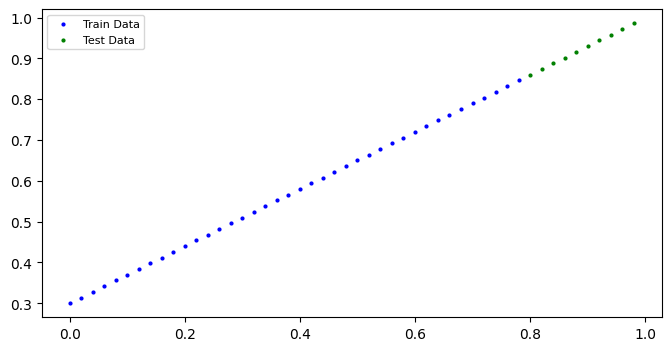

In [16]:
plot_predict()

### 2. Build Model

[Python Class Object Concept](https://realpython.com/python3-object-oriented-programming/)

What our model does?
- Start with random values (weights and bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (weight and bias values we used to create data)

How does it do so?
- [Gradient descent](https://www.youtube.com/watch?v=IHZwWFHWa-w)
- [Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

[TORCH.NN.MODULE Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)

In [17]:
# Create a linear regression model class
class LinearRegression(nn.Module):    # nn.Module contains building blocks(subclass) of neural networks
  def __init__(self):
    super()._init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,   # set parameter to be updated via gradient descent -> True
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,   # set parameter to be updated via gradient descent -> True
                                         dtype = torch.float))

    # Forward method to define the computation in model
    def forward(self, x:torch.Tensor) -> torch.Tensor:    # 'x' is input data
      return self.weights * x + self.bias   # Linear regression formula

<img src='https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png'>

### PyTorch Model Build Essentials

| PyTorch Model Build Essentials | Description |
| ------------------------------ | ----------- |
| torch.nn                       | Contains all of the buildings for neural networks |
| torch.nn.Parameter             | Specifies what parameters our model should try and learn |
| torch.nn.Module                | Base class for all neural network models; if subclassed, you should overwrite `forward()` |
| torch.optim                    | Contains optimizers in PyTorch, aiding in gradient descent |
| `def forward():`               | All `nn.Module` subclasses require this method; it defines what happens in forward computation |

[PYTORCH CHEAT SHEET](https://pytorch.org/tutorials/beginner/ptcheat.html)